<a href="https://colab.research.google.com/github/adrien-chinour/ia-data/blob/master/06-deep-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Réseaux de neurones

In [0]:
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib
import matplotlib.pyplot as plt

## Exercice 1 : Un réseau à un seul neurone

1. Donner les expressions mathématiques de la sortie y du neurone en fonction dex,W,betσ.
2. Donner l’expression mathématique de le fonction de perte L. Utiliser pour cela la cross entropy.
3. Compléter le fichier pour implémenter tous les éléments nécessaires à l’entrainement de votr emodèle.
4. Entrainer le modéle.

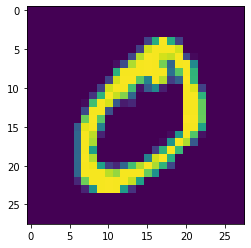

In [0]:
# Récupération des données
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[1])
plt.show()

In [0]:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

# converti les pixels en réels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# normalise la valeur entre 0 et 1
X_train  = X_train / 255
X_test  = X_test / 255

In [0]:
y_new = np.zeros(y_train.shape)
y_new[np.where(y_train==5.0)[0]] = 1
y_train = y_new

y_new = np.zeros(y_test.shape)
y_new[np.where(y_test==5.0)[0]] = 1
y_test = y_new

In [0]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Dense

def neural_network():
  network = Sequential()
  network.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
  network.add(Dense(2, kernel_initializer='normal', activation='softmax'))
  network.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return network

my_network = neural_network()
my_network.summary()
my_network.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=100)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 1570      
Total params: 617,010
Trainable params: 617,010
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 10s 162us/step - loss: 0.1041 - acc: 0.9668 - val_loss: 0.0783 - val_acc: 0.9766
Epoch 2/10
60000/60000 [==============================] - 8s 140us/step - loss: 0.0536 - acc: 0.9832 - val_loss: 0.0416 - val_acc: 0.9863
Epoch 3/10
60000/60000 [==============================] - 9s 143us/step - loss: 0.0330 - acc: 0.9892 - val_loss: 0.0292 - val_acc: 0.9901
Epoch 4/10
60000/60000 [===============

In [0]:
scores = my_network.evaluate(X_test,y_test)
print(scores)

10000/10000 [==============================] - 1s 63us/step
[0.014163989494106499, 0.9955]
